In [1]:
import h5py
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 20})
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

from pycbc.conversions import eta_from_mass1_mass2, mchirp_from_mass1_mass2, mass1_from_mchirp_eta, mass2_from_mchirp_eta

In [2]:
data = h5py.File('H1L1V1-BANKSIM_MATCH_COMBINE_BROADINJ1-2620801-1163865616.h5', 'r')
data['inj_params'].keys()

<KeysViewHDF5 ['coa_phase', 'inclination', 'latitude', 'longitude', 'mass1', 'mass2', 'polarization', 'spin1x', 'spin1y', 'spin1z', 'spin2x', 'spin2y', 'spin2z']>

In [3]:
m1 = data['inj_params']['mass1'][:]
m2 = data['inj_params']['mass2'][:]
chi1= data['inj_params']['spin1z'][:]
chi2 = data['inj_params']['spin2z'][:]
match = data['trig_params']['match'][:]
mchirp = mchirp_from_mass1_mass2(m1, m2)
eta = eta_from_mass1_mass2(m1, m2)

In [4]:
#sel = np.logical_and(eta < 0.249, np.logical_and(eta > 0.1, np.logical_and(mchirp >5, mchirp < 50)))

sel = np.logical_and(eta > 0.1, np.logical_and(mchirp >5, mchirp < 20))

constrained_m1 = m1[sel]
constrained_m2=m2[sel]
constrained_chi1=chi1[sel]
constrained_chi2=chi2[sel]
constrained_match=match[sel]
constrained_mchirp=mchirp[sel]
constrained_eta=eta[sel]

In [5]:
print(f'There are a total of {len(constrained_m1)} injections.')

There are a total of 9469 injections.


In [6]:
print(f'There were {len(constrained_m1[constrained_match < 0.97])} injections that were not recovered and have a fitting factor less than 0.97.')

There were 53 injections that were not recovered and have a fitting factor less than 0.97.


In [7]:
print(f'{(len(constrained_m1)-len(constrained_m1[constrained_match < 0.97]))/(len(constrained_m1))*100} of injections were recovered with a Fitting factor greater than 0.97.')

99.44027880452 of injections were recovered with a Fitting factor greater than 0.97.


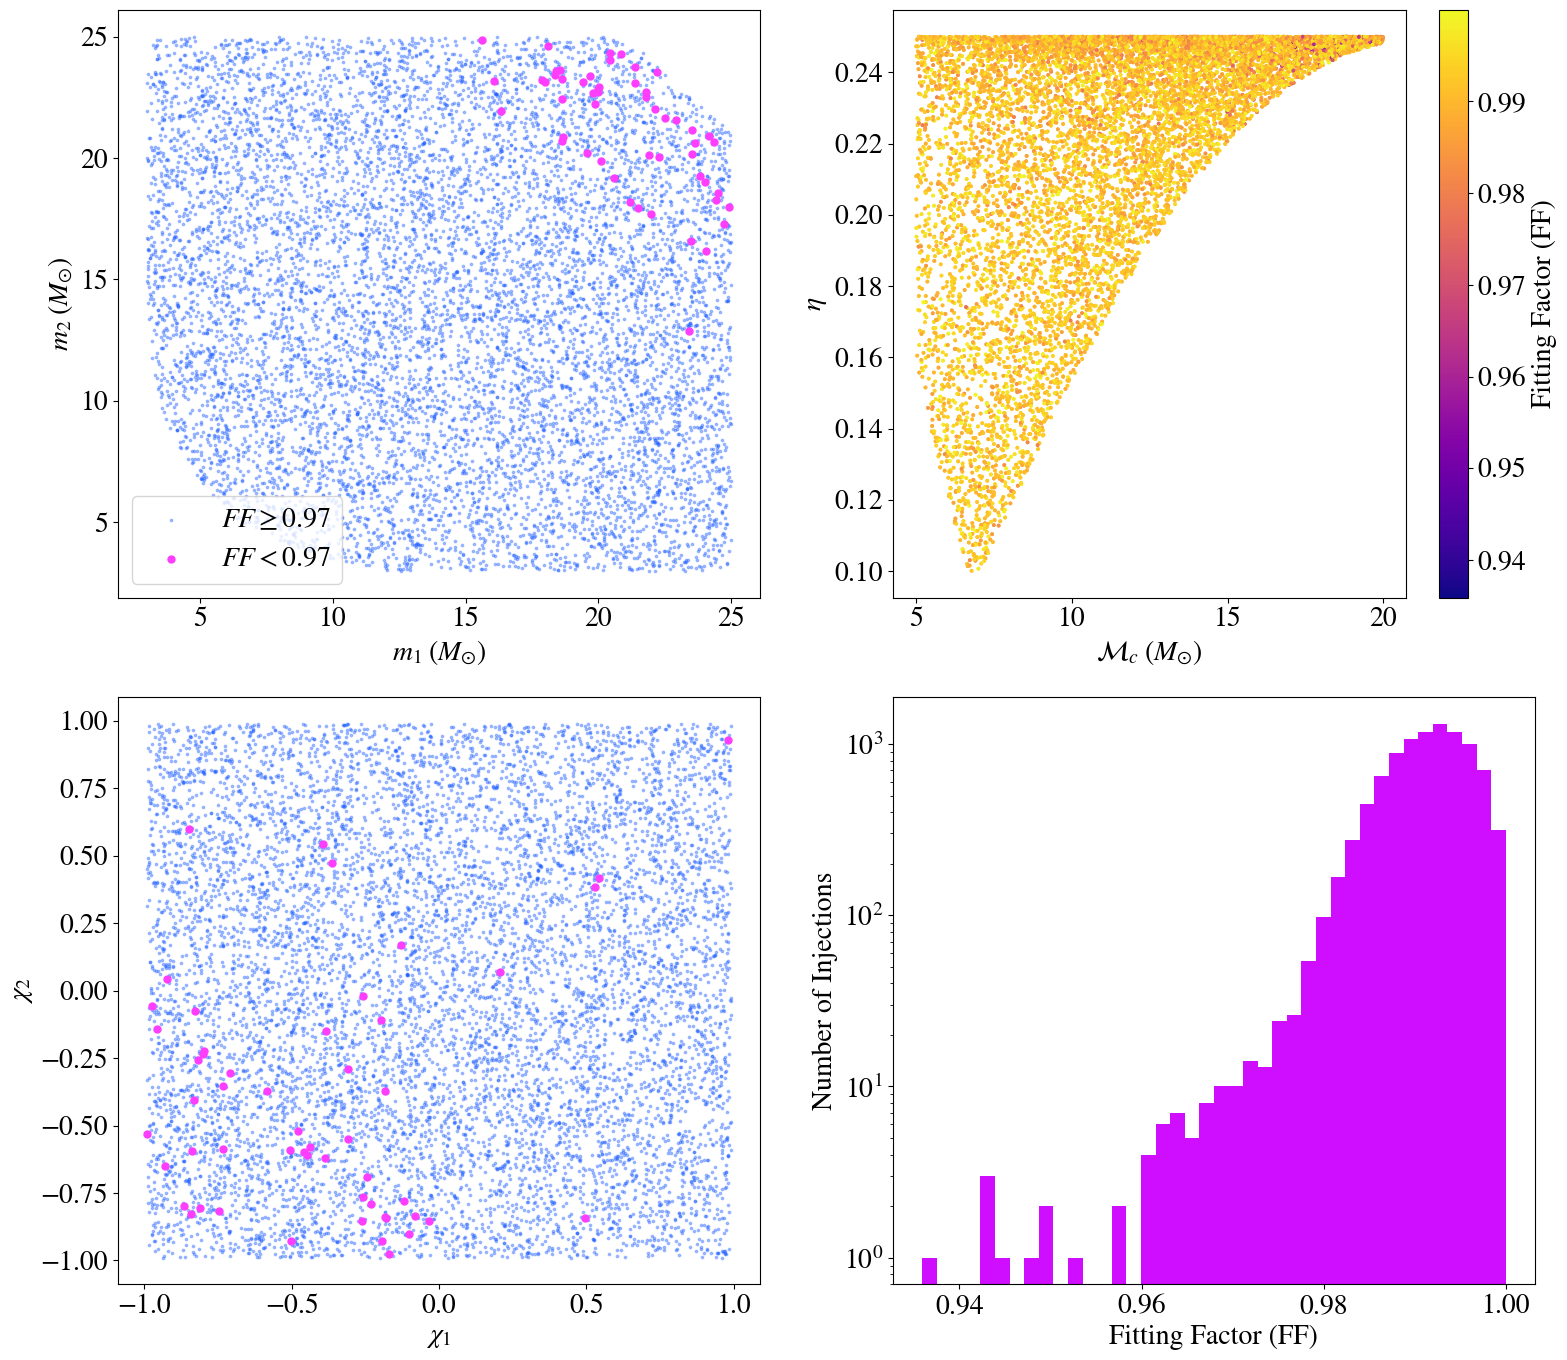

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(16, 14))

ax1.scatter(constrained_m1[constrained_match >= 0.97], constrained_m2[constrained_match >= 0.97], color='#1c5dff', s=3, alpha=0.35, label='$FF \geq 0.97$')
ax1.scatter(constrained_m1[constrained_match < 0.97], constrained_m2[constrained_match < 0.97], color='#fe3dfd', s=25, label='$FF < 0.97$')
ax1.set_xlabel('$m_{1} \; (M_{\odot})$')
ax1.set_ylabel('$m_{2} \; (M_{\odot})$')
ax1.legend()

ax2.scatter(constrained_mchirp, constrained_eta, c=constrained_match, s=3, cmap='plasma')
ax2.set_xlabel('$\mathcal{M}_{c} \; (M_{\odot})$')
ax2.set_ylabel('$\eta$')


ax3.scatter(constrained_chi1[constrained_match >= 0.97], constrained_chi2[constrained_match >= 0.97], color='#1c5dff', s=3, alpha=0.35)
ax3.scatter(constrained_chi1[constrained_match < 0.97], constrained_chi2[constrained_match < 0.97], color='#fe3dfd', s=25)
ax3.set_xlabel('$\chi_{1}$')
ax3.set_ylabel('$\chi_{2}$')

ax4.hist(constrained_match, color='#cf0dff', bins=40)
ax4.set_xlabel('Fitting Factor (FF)')
ax4.set_ylabel('Number of Injections')
ax4.set_yscale('log')


fig.colorbar(ax2.scatter(constrained_mchirp, constrained_eta, c=constrained_match, s=3, cmap='plasma'), label='Fitting Factor (FF)')
fig.tight_layout() 
fig.savefig('Results_Small.png', dpi=300, bbox_inches='tight')